# Telecom Churn Rate Dataset - Exploratory and Descriptive Analysis
This notebook is focused on the exploratory and descriptive analysis of the cleaned version of the Telecom Churn Rate Dataset.To begin with, we import all the necessary Python libraries required for data handling, analysis, and processing.

- `pandas` for data manipulation
- `numpy` for numerical operations
- `os` for handling directory paths

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import plotly.express as px

## Define and create Paths
We define the folder structure to organize our project. This includes:

- `data/raw` for raw data files
- `data/processed` for cleaned and transformed datasets
- `results` for any output files such as plots or models
- `docs` for documentation or rendered outputs (e.g., HTML, PDF)

We also ensure these directories are created if they don't already exist.


In [4]:
# get working directory 
Current_dir = os.getcwd()
# on one directory up to the root directory 
project_root_dir = os.path.dirname(Current_dir)
# define paths to the data folders
data_dir = os.path.join(project_root_dir,'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')
# define paths to result folder 
results_dir = os.path.join(project_root_dir,'results')
# define paths to docs folder 
docs_dir = os.path.join(project_root_dir,'docs')

# create directories if they do not eFileExists 
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## Loading the Dataset
Now we load the raw dataset (Telecom Churn Rate Dataset) from the `raw` directory using `pandas.read_excel()`.

Missing values are identified using the placeholder `?`, which we convert to `NaN`.

In [7]:
telecom_filename = os.path.join(processed_dir,'cleaned.xlsx')
telecom_df = pd.read_excel(telecom_filename)
telecom_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,digital subscriber line,no,...,no,no,month-to-month,yes,electronic check,29.85,29.85,0,0,no
1,5575-gnvde,male,0,no,no,34,yes,no,digital subscriber line,yes,...,no,no,one year,no,mailed check,56.95,1889.50,0,0,no
2,3668-qpybk,male,0,no,no,2,yes,no,digital subscriber line,yes,...,no,no,month-to-month,yes,mailed check,53.85,108.15,0,0,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,digital subscriber line,yes,...,no,no,one year,no,bank transfer (automatic),42.30,1840.75,0,3,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,month-to-month,yes,electronic check,70.70,151.65,0,0,yes
5,9305-cdskc,female,0,no,no,8,yes,yes,fiber optic,no,...,yes,yes,month-to-month,yes,electronic check,99.65,820.50,0,0,yes
6,1452-kiovk,male,0,no,yes,22,yes,yes,fiber optic,no,...,yes,no,month-to-month,yes,credit card (automatic),89.10,1949.40,0,0,no
7,6713-okomc,female,0,no,no,10,no,no phone service,digital subscriber line,yes,...,no,no,month-to-month,no,mailed check,29.75,301.90,0,0,no
8,7892-pookp,female,0,yes,no,28,yes,yes,fiber optic,no,...,yes,yes,month-to-month,yes,electronic check,104.80,3046.05,0,2,yes
9,6388-tabgu,male,0,no,yes,62,yes,no,digital subscriber line,yes,...,no,no,one year,no,bank transfer (automatic),56.15,3487.95,0,0,no


We use `.shape` to see the number of rows and columns in the dataset.
This helps us understand the scale of the data.

In [9]:
telecom_df.shape

(7043, 23)

The `.info()` method gives a concise summary of the dataset, including:

- Column names and types
- Number of non-null entries
- Memory usage

This helps us assess the completeness of the data and identify potential issues.

In [11]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Summary statistics
### Numerical variables

In [14]:
telecom_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.515689,0.419566
std,0.368612,24.559481,30.090047,2266.794470,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000


### Categorical Variables

In [17]:
telecom_df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-vhveg,male,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,no
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [21]:
telecom_df['gender'].value_counts()

gender
male      3555
female    3488
Name: count, dtype: int64

In [23]:
telecom_df['gender'].value_counts(normalize=True)

gender
male      0.504756
female    0.495244
Name: proportion, dtype: float64

In [25]:
telecom_df['Partner'].value_counts()

Partner
no     3641
yes    3402
Name: count, dtype: int64

In [27]:
telecom_df['Partner'].value_counts(normalize=True)

Partner
no     0.516967
yes    0.483033
Name: proportion, dtype: float64

In [29]:
telecom_df['Dependents'].value_counts()

Dependents
no     4933
yes    2110
Name: count, dtype: int64

In [31]:
telecom_df['Dependents'].value_counts(normalize=True)

Dependents
no     0.700412
yes    0.299588
Name: proportion, dtype: float64

In [33]:
telecom_df['PhoneService'].value_counts()

PhoneService
yes    6361
no      682
Name: count, dtype: int64

In [35]:
telecom_df['PhoneService'].value_counts(normalize=True)

PhoneService
yes    0.903166
no     0.096834
Name: proportion, dtype: float64

In [37]:
telecom_df['MultipleLines'].value_counts()

MultipleLines
no                  3390
yes                 2971
no phone service     682
Name: count, dtype: int64

In [39]:
telecom_df['MultipleLines'].value_counts(normalize=True)

MultipleLines
no                  0.481329
yes                 0.421837
no phone service    0.096834
Name: proportion, dtype: float64

In [41]:
telecom_df['InternetService'].value_counts()

InternetService
fiber optic                3096
digital subscriber line    2421
no                         1526
Name: count, dtype: int64

In [43]:
telecom_df['InternetService'].value_counts(normalize=True)

InternetService
fiber optic                0.439585
digital subscriber line    0.343746
no                         0.216669
Name: proportion, dtype: float64

In [45]:
telecom_df['OnlineSecurity'].value_counts()

OnlineSecurity
no                     3498
yes                    2019
no internet service    1526
Name: count, dtype: int64

In [47]:
telecom_df['OnlineSecurity'].value_counts(normalize=True)

OnlineSecurity
no                     0.496663
yes                    0.286668
no internet service    0.216669
Name: proportion, dtype: float64

In [49]:
telecom_df['OnlineBackup'].value_counts()

OnlineBackup
no                     3088
yes                    2429
no internet service    1526
Name: count, dtype: int64

In [51]:
telecom_df['OnlineBackup'].value_counts(normalize=True)

OnlineBackup
no                     0.438450
yes                    0.344881
no internet service    0.216669
Name: proportion, dtype: float64

In [53]:
telecom_df['DeviceProtection'].value_counts()

DeviceProtection
no                     3095
yes                    2422
no internet service    1526
Name: count, dtype: int64

In [55]:
telecom_df['DeviceProtection'].value_counts(normalize=True)

DeviceProtection
no                     0.439443
yes                    0.343888
no internet service    0.216669
Name: proportion, dtype: float64

In [57]:
telecom_df['TechSupport'].value_counts()

TechSupport
no                     3473
yes                    2044
no internet service    1526
Name: count, dtype: int64

In [59]:
telecom_df['TechSupport'].value_counts(normalize=True)

TechSupport
no                     0.493114
yes                    0.290217
no internet service    0.216669
Name: proportion, dtype: float64

In [61]:
telecom_df['StreamingTV'].value_counts()

StreamingTV
no                     2810
yes                    2707
no internet service    1526
Name: count, dtype: int64

In [63]:
telecom_df['StreamingTV'].value_counts(normalize=True)

StreamingTV
no                     0.398978
yes                    0.384353
no internet service    0.216669
Name: proportion, dtype: float64

In [65]:
telecom_df['Contract'].value_counts()

Contract
month-to-month    3875
two year          1695
one year          1473
Name: count, dtype: int64

In [67]:
telecom_df['Contract'].value_counts(normalize=True)

Contract
month-to-month    0.550192
two year          0.240664
one year          0.209144
Name: proportion, dtype: float64

In [69]:
telecom_df['PaperlessBilling'].value_counts()

PaperlessBilling
yes    4171
no     2872
Name: count, dtype: int64

In [71]:
telecom_df['PaperlessBilling'].value_counts(normalize=True)

PaperlessBilling
yes    0.592219
no     0.407781
Name: proportion, dtype: float64

In [73]:
telecom_df['PaymentMethod'].value_counts()

PaymentMethod
electronic check             2365
mailed check                 1612
bank transfer (automatic)    1544
credit card (automatic)      1522
Name: count, dtype: int64

In [75]:
telecom_df['PaymentMethod'].value_counts(normalize=True)

PaymentMethod
electronic check             0.335794
mailed check                 0.228880
bank transfer (automatic)    0.219225
credit card (automatic)      0.216101
Name: proportion, dtype: float64

 ### Understanding the Churn Column

In our dataset, there is a `Churn` column that indicates whether a customer has left the telecom service or not:

- **Yes** – The customer has **churned**, meaning they have **canceled** their service or switched to another provider.
- **No** – The customer is **still active**, meaning they have * the telecom company.


In [77]:
telecom_df['Churn'].value_counts()

Churn
no     5174
yes    1869
Name: count, dtype: int64

In [79]:
telecom_df['Churn'].value_counts(normalize=True)

Churn
no     0.73463
yes    0.26537
Name: proportion, dtype: float64

### Churn rate
 **What is Churn Rate?**

In the telecom industry, **Churn Rate** refers to the percentage of customers who stop using the company's services during a specific period of time.

It is a key performance indicator (KPI) used to measure customer retention and loportant?

High churn rates can signal:

- Poor customer satisfaction
- High competition
- Issues with service quality or pricing

Reducing churn is crucial for maintaining revenue and customer base.


telecom_df_churn = telecom_df.groupby('Churn').size().reset_index(name='churn_total')
telecom_df_churn

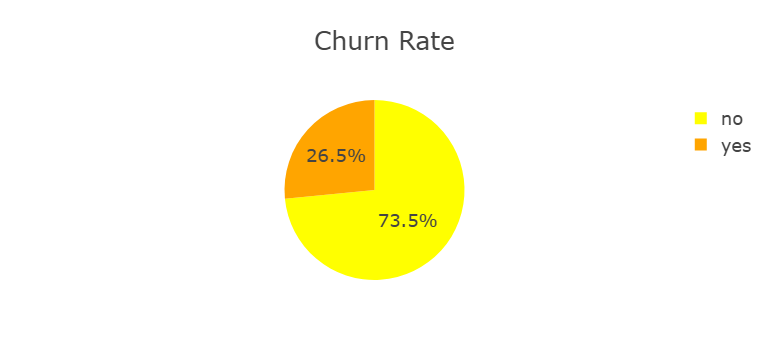

In [96]:
fig = px.pie(
    telecom_df_churn,
    names='Churn',
    values='churn_total',
    title='Churn Rate',
    color_discrete_sequence=['yellow','orange']
)

fig.update_layout(
    template="presentation",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'Churn_Rate_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Churn_Rate_pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'Churn_Rate_pie_chart.html'))

After analyzing the dataset, we observe the following churn rate:

- **26.5%** of customers have churned (**Churn = Yes**)
- **73.5%** of customers have remained loyal (**Churn = No**)


- Out of every 100 customers, about **27 leave the telecom service**, while **73 continue** using it.
- A churn rate of **26.5%** is relatively **high** in the telecom industry and could be a sign of underlying issues such as:
  - Poor customer service
  - Uncompetitive pricing
  - Limited network coverage
  - Inadequate value propositions compared to competitors


Understanding churn rate is essential because:

- **Customer acquisition costs** are high. It's often more expensive to gain a new customer than to retain an existing one.
- A high churn rate can lead to **revenue loss** and affect the company’s **growth and sustainability**.
- Identifying the factors that lead to churn enables the company to take **targeted actions** to reduce it.

This insight sets the foundation for deeper analysis, such as:
- Segmenting churned users
- Identifying top predictors of churn
- Designing customer retention strategies

### Gender Distribution

In [145]:
telecom_df_gender= telecom_df.groupby(['gender']).size().reset_index(name='total')
telecom_df_gender

,gender,total
0,female,3488
1,male,3555


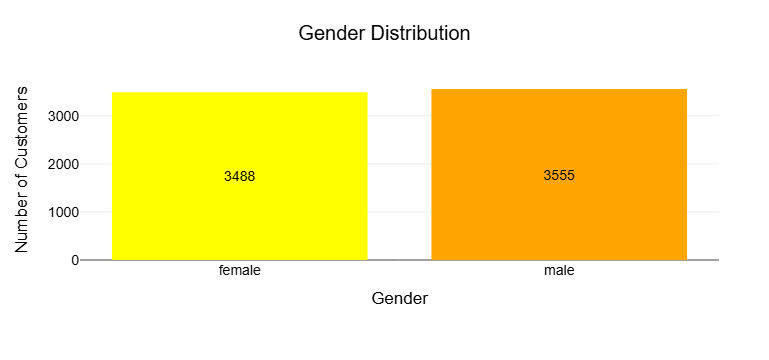

In [219]:

fig = px.bar(
    telecom_df_gender,
    x='gender',
    y='total',
    color='gender', 
    title='Gender Distribution',
    text='total',
    color_discrete_sequence=['yellow', 'orange']
)

fig.update_traces(
    texttemplate='%{text:.0f}', 
    textposition='inside',
    insidetextanchor='middle',
    textfont=dict(size=14, color='black'),
    cliponaxis=False
)

fig.update_layout(
    template="presentation",
    xaxis_title='Gender',
    yaxis_title='Number of Customers',
    showlegend=False,
    font=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    title_font=dict(
        family="Arial",
        size=20,
        color="black"
    ),
    margin=dict(l=80, r=50, t=80, b=100),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'Gender_Distribution_bar_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Gender_Distribution_bar_chart.png'))
fig.write_html(os.path.join(results_dir, 'Gender_Distribution_bar_chart.html'))


The dataset includes customer information classified by gender. Here's the breakdown:

- **Female**: 3,488 customers
- **Male**: 3,555 customers

- The gender distribution is nearly balanced, with **51.9% male** and **48.1% female**.
- Since the difference is small, **gender is unlikely to be a strong biasing factor** in this dataset.

### Payment Method

The dataset includes information about the preferred **payment methods** used by customers. The distribution is as follows:

- **Electronic Check**: 34%
- **Mailed Check**: 23%
- **Bank Transfer (Automatic)**: 22%
- **Credit Card (Automatic)**: 22%


In [139]:
telecom_df_payment_method = telecom_df['PaymentMethod'].value_counts(normalize=True).round(2).reset_index(name='payment_method_rate')
telecom_df_payment_method

,PaymentMethod,payment_method_rate
0,electronic check,0.34
1,mailed check,0.23
2,bank transfer (automatic),0.22
3,credit card (automatic),0.22


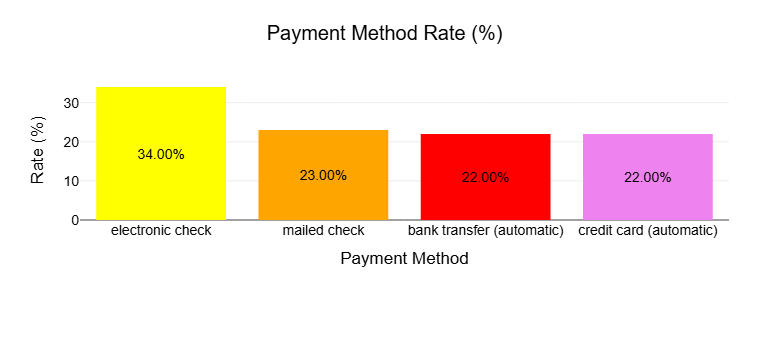

WARNING	Thread(Thread-84 (run)) Task(Task-1450) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


In [217]:

telecom_df_payment_method['payment_method_rate'] *= 100

fig = px.bar(
    telecom_df_payment_method,
    x='PaymentMethod',
    y='payment_method_rate',
    color='PaymentMethod',
    title='Payment Method Rate (%)',
    text='payment_method_rate',
    color_discrete_sequence=['yellow', 'orange', 'red', 'violet']
)

fig.update_traces(
    texttemplate='%{text:.2f}%',  
    textposition='inside',
    insidetextanchor='middle',
    textfont=dict(size=14, color='black'),
    cliponaxis=False
)

fig.update_layout(
    template="presentation",
    xaxis_title='Payment Method',
    yaxis_title='Rate (%)',
    showlegend=False,
    font=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    title_font=dict(
        family="Arial",
        size=20,
        color="black"
    ),
    margin=dict(l=80, r=40, t=80, b=140),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'Payment_Method_Rate_bar_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Payment_Method_Rate_bar_chart.png'))
fig.write_html(os.path.join(results_dir, 'Payment_Method_Rate_bar_chart.html'))




- **Electronic Check** is the most common payment method, used by over one-third of the customers.
- Automatic payment methods (bank transfer and credit card) together account for **44%**, indicating that a significant portion of customers prefer convenience and automation.
- The presence of **manual methods** like mailed checks (23%) suggests that some customers may still prefer traditional payment options.

Understanding the distribution of payment methods is important for:
- **Customer segmentation**
- Identifying churn risks (e.g., manual payments may be associated with higher churn)
- Designing targeted financial services or offers


### Paperless Billing
The dataset tracks whether customers opted for **paperless billing** or not. The distribution is as follows:

- **Yes** (Paperless Billing): 59%
- **No** (Paper Billing): 41%

In [156]:
telecom_df_billing= telecom_df['PaperlessBilling'].value_counts(normalize=True).reset_index(name='paperless_rate').round(2)
telecom_df_billing

,PaperlessBilling,paperless_rate
0,yes,0.59
1,no,0.41


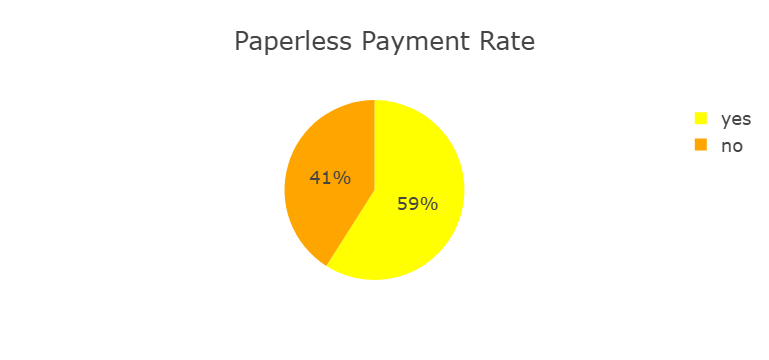

In [160]:
fig = px.pie(
    telecom_df_billing,
    names='PaperlessBilling',
    values='paperless_rate',
    title='Paperless Payment Rate',
    color_discrete_sequence=['yellow','orange']
)

fig.update_layout(
    template="presentation",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'paperless_rate_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'paperless_rate_pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'paperless_rate_pie_chart.html'))

- A **majority of customers (59%)** prefer receiving their bills electronically, which suggests a strong adoption of digital billing methods.
- However, **41% still receive paper bills**, indicating that a significant portion of customers may:
  - Be less tech-savvy
  - Prefer traditional methods
  - Have limited access to digital platforms

Understanding billing preferences can help the company:
- Promote environmentally friendly practices
- Reduce mailing costs

### Number of Contracts 
Customers in the dataset are categorized based on the type of contract they hold. Here's the breakdown:

- **Month-to-Month**: 3,875 customers
- **One Year**: 1,473 customers
- **Two Year**: 1,695 customers

In [200]:
telecom_df_contract = telecom_df.groupby('Contract').size().reset_index(name='Number_of_contract')
telecom_df_contract['Number_of_contract'] = telecom_df_contract['Number_of_contract'].round(2)
telecom_df_contract


,Contract,Number_of_contract
0,month-to-month,3875
1,one year,1473
2,two year,1695


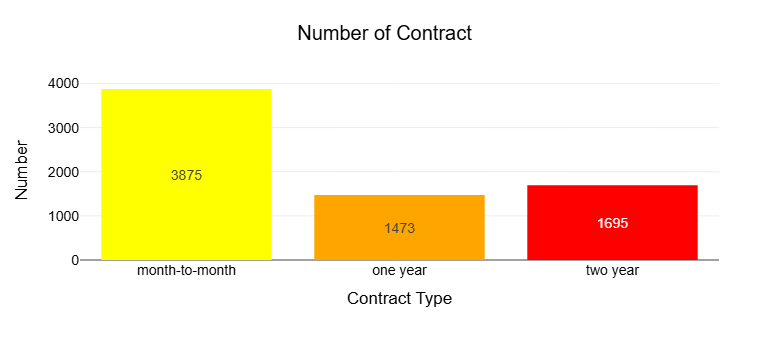

WARNING	Thread(Thread-72 (run)) Task(Task-1226) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


In [211]:

fig = px.bar(
    telecom_df_contract,
    x='Contract',
    y='Number_of_contract',
    color='Contract',  
    title='Number of Contract',
    text='Number_of_contract',
    color_discrete_sequence=['yellow', 'orange', 'red', 'violet']
)

fig.update_traces(
    texttemplate='%{text:.0f}',  
    textposition='inside',
    insidetextanchor='middle'
)

fig.update_layout(
    template="presentation",
    xaxis_title='Contract Type',
    yaxis_title='Number',
    showlegend=False,
    font=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    title_font=dict(
        family="Arial",
        size=20
    ),
    margin=dict(l=80, r=50, t=80, b=100),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'Contract_Number_bar_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Contract_Number_bar_chart.png'))
fig.write_html(os.path.join(results_dir, 'Contract_Number_bar_chart.html'))



- The majority of customers (**~57%**) are on **month-to-month contracts**, which are typically more flexible and easier to cancel.
- Long-term contracts (one-year and two-year combined) account for **~43%** of the customer base.
- Customers on month-to-month contracts may be **more likely to churn**, as they face fewer barriers to switching providers.
- In contrast, those with longer contracts may demonstrate **higher retention** due to commitment incentives or penalties for early termination.
